In [1]:
%matplotlib inline

In [ ]:
#

In [52]:
def name():
    return()


for i in range(10):
    pass 

if i :
    pass 

In [54]:
print(name())

None


In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pathlib

!pip install numpy pandas matplotlib statsmodels scipy nose sympy patsy seaborn

# Data

     - Historical Sales and Active Inventory [kaggle competition](https://www.kaggle.com/flenderson/sales-analysis)

In [3]:
parent_path  = pathlib.Path("..")
DATA = parent_path / "data/sales-analysis/SalesKaggle3.csv"

In [4]:
DATA, DATA.is_file()

(PosixPath('../data/sales-analysis/SalesKaggle3.csv'), True)

In [5]:
sales_data = pd.read_csv(DATA,low_memory=False)
sales_data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [6]:
sales_data.head(10)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0.0,0.0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0.0,0.0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0.0,0.0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0.0,0.0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0.0,0.0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


In [7]:
sales_data.head().T

,0,1,2,3,4
Order,2,3,4,6,7
File_Type,Historical,Historical,Historical,Historical,Historical
SKU_number,1737127,3255963,612701,115883,863939
SoldFlag,0,0,0,1,1
SoldCount,0,0,0,1,1
MarketingType,D,D,D,D,D
ReleaseNumber,15,7,0,4,2
New_Release_Flag,1,1,0,1,1
StrengthFactor,682743,1.01601e+06,340464,334011,1.28794e+06
PriceReg,44.99,24.81,46,100,121.95


In [38]:
sales_data.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [39]:
sales_data.shape

(198917, 14)

## Col Names
    
    - File_type The value "Active means that the particulkar product ned investigation 
    
    - SKU_number: This is the unique identifier for each product.

    - Order: Just a sequential counter. Can be ignored.

    - SoldFlag: 1 = sold in past 6 mos. 0 = Not sold

    - MarketingType = Two categories of how we market the product. This should probably be ignored, or better yet, each type should be considered independently.

    - New_Release_Flag = Any product that has had a future release (i.e., Release Number > 1)

In [40]:
sales_data.shape

(198917, 14)

In [41]:
sales_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order,198917,NaN,NaN,NaN,106484,60136.7,2,55665,108569,158298,208027
File_Type,198917,2,Active,122921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU_number,198917,NaN,NaN,NaN,861363,869979,50001,217252,612208,904751,3.96079e+06
SoldFlag,75996,NaN,NaN,NaN,0.171009,0.376519,0,0,0,0,1
SoldCount,75996,NaN,NaN,NaN,0.322306,1.16862,0,0,0,0,73
MarketingType,198917,2,S,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseNumber,198917,NaN,NaN,NaN,3.4122,3.86424,0,1,2,5,99
New_Release_Flag,198917,NaN,NaN,NaN,0.642248,0.47934,0,0,1,1,1
StrengthFactor,198917,NaN,NaN,NaN,1.11712e+06,1.52209e+06,6.275,161419,582224,1.43008e+06,1.73845e+07
PriceReg,198917,NaN,NaN,NaN,90.8952,86.7364,0,42,69.95,116,12671.5


In [42]:
sales_data.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [43]:
sales_data.head().T

,0,1,2,3,4
Order,2,3,4,6,7
File_Type,Historical,Historical,Historical,Historical,Historical
SKU_number,1737127,3255963,612701,115883,863939
SoldFlag,0,0,0,1,1
SoldCount,0,0,0,1,1
MarketingType,D,D,D,D,D
ReleaseNumber,15,7,0,4,2
New_Release_Flag,1,1,0,1,1
StrengthFactor,682743,1.01601e+06,340464,334011,1.28794e+06
PriceReg,44.99,24.81,46,100,121.95


In [44]:
bool_arr_hist = sales_data["File_Type"]  == "Historical" # pd seris for hist data 
bool_arr_act = sales_data["File_Type"]  == "Active"

sales_data_hist = sales_data[bool_arr_hist]
sales_data_act = sales_data[bool_arr_act]

# Univariate and Bivariate analysis
    
       - Unvivariate distribution are graphs where we plot hist with PDF
       - Bivariate analysis is a scatter plot b/w 2 variables

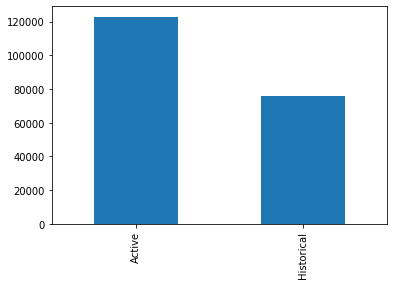

In [47]:
val_count = sales_data.File_Type.value_counts()
val_count.plot.bar()

In [45]:
val_count = sales_data["MarketingType"].value_counts()
val_count

S    100946
D     97971
Name: MarketingType, dtype: int64

In [51]:
val_count.to_dict()

{'Active': 122921, 'Historical': 75996}

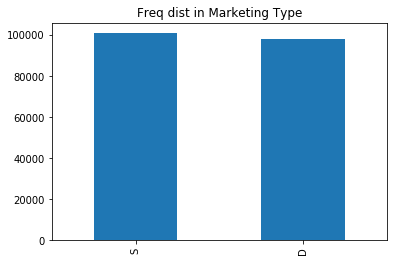

In [52]:
val_count = sales_data["MarketingType"].value_counts()
val_count.plot.bar(title="Freq dist in Marketing Type")#when catgerical data

In [53]:
sales_data.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

0 StrengthFactor
1 PriceReg
2 ReleaseYear
3 ItemCount
4 LowUserPrice
5 LowNetPrice


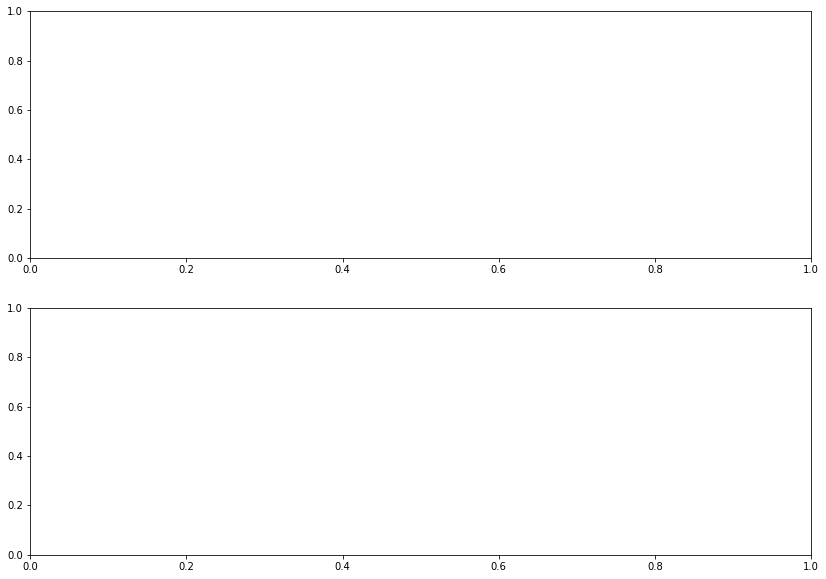

In [58]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots( nrows=2, figsize=(14,10))
for x , i in enumerate(col_names):
    print(x , i)

In [8]:
sales_data.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

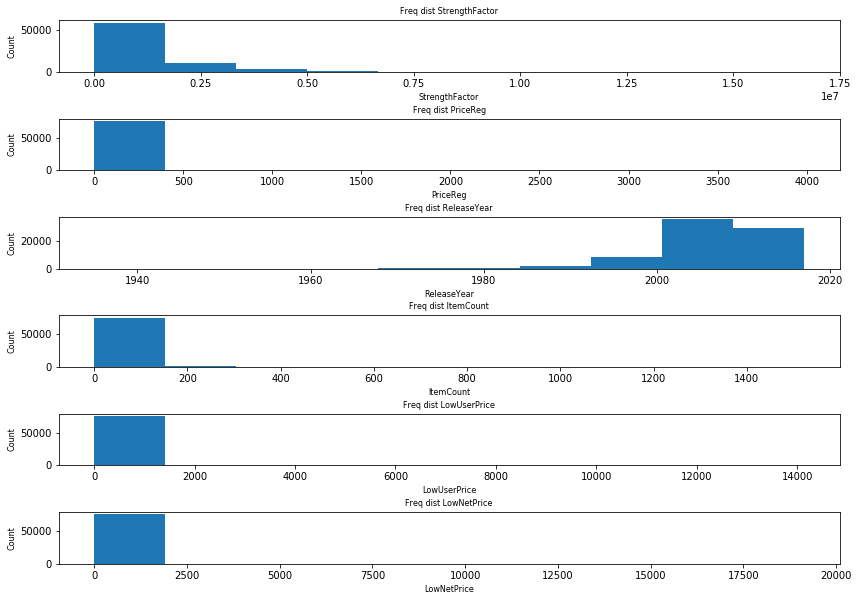

In [60]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots( nrows=len(col_names), figsize=(14,10))

for i, col_val in enumerate(col_names):
    
    ax[i].hist(sales_data_hist[col_val],density=True, facecolor='g', alpha=0.75) # draw the plot in the subplot space
    ax[i].set_title('Freq dist '+col_val, fontsize=8)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    plt.subplots_adjust(hspace = .9)
    


In [15]:
sales_data_hist.head().T

,0,1,2,3,4
Order,2,3,4,6,7
File_Type,Historical,Historical,Historical,Historical,Historical
SKU_number,1737127,3255963,612701,115883,863939
SoldFlag,0,0,0,1,1
SoldCount,0,0,0,1,1
MarketingType,D,D,D,D,D
ReleaseNumber,15,7,0,4,2
New_Release_Flag,1,1,0,1,1
StrengthFactor,682743,1.01601e+06,340464,334011,1.28794e+06
PriceReg,44.99,24.81,46,100,121.95


In [61]:
sales_data_hist = sales_data_hist.drop([   
    'Order', 'File_Type','SKU_number','SoldFlag',
    'MarketingType','ReleaseNumber','New_Release_Flag'
], axis=1)

In [63]:
sales_data_hist.columns

Index(['SoldCount', 'StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount',
       'LowUserPrice', 'LowNetPrice'],
      dtype='object')

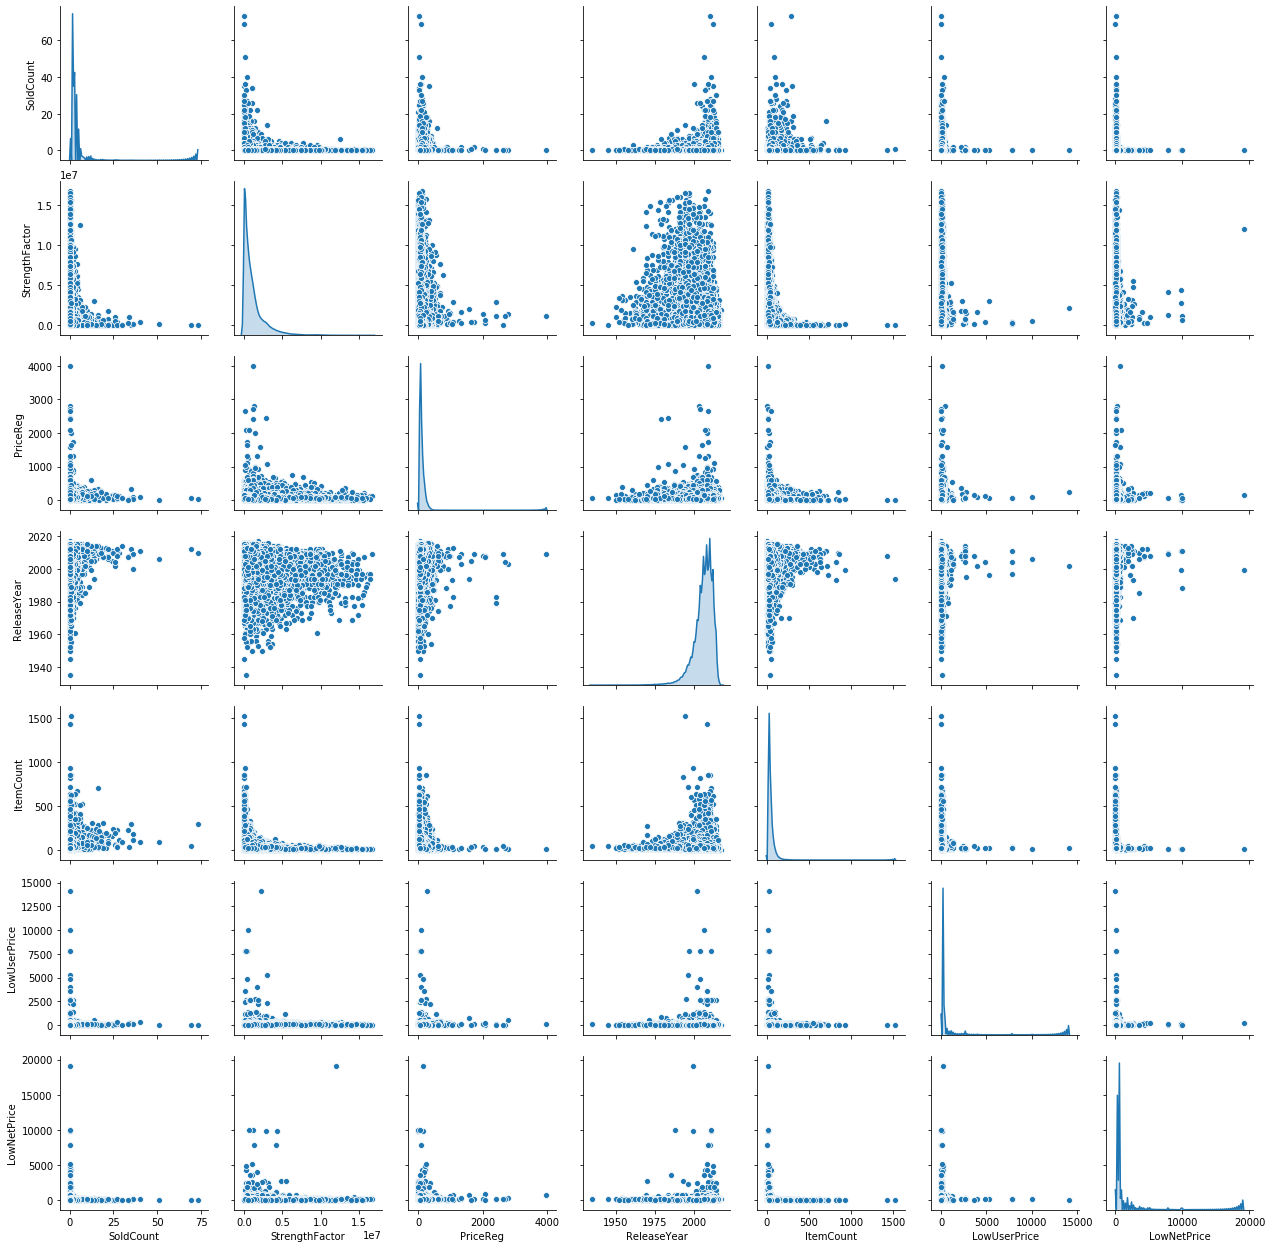

In [67]:

sns.pairplot(sales_data_hist, vars=sales_data_hist.columns 
             ,diag_kind="kde") #Bivariate anaylsis

(array([0.00809324, 0.03776845, 0.16186477, 0.29810094, 0.38442882,
        0.31698516, 0.11195646, 0.02562859, 0.00269775, 0.00134887]),
 array([-3.27538414, -2.53402453, -1.79266491, -1.05130529, -0.30994568,
         0.43141394,  1.17277355,  1.91413317,  2.65549278,  3.3968524 ,
         4.13821202]),
 <a list of 10 Patch objects>)

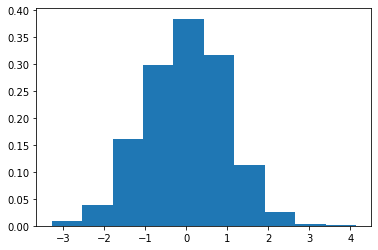

In [27]:
x = np.random.randn(1000)
plt.hist(x,density=True)

In [14]:
y = np.random.randn(1000)

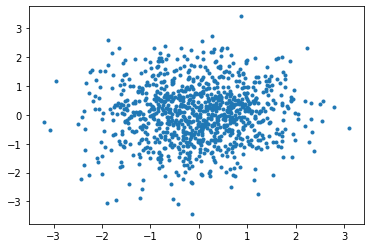

In [19]:
plt.plot(y, x, ".")

# Missing Value analysis


In [18]:
sales_data.isnull().values.any()

True

In [19]:
sales_data.isnull().values.any()

True

In [20]:
sales_data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [21]:
#sales_data["SoldFlag"].fillna(0,inplace=True)

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg")

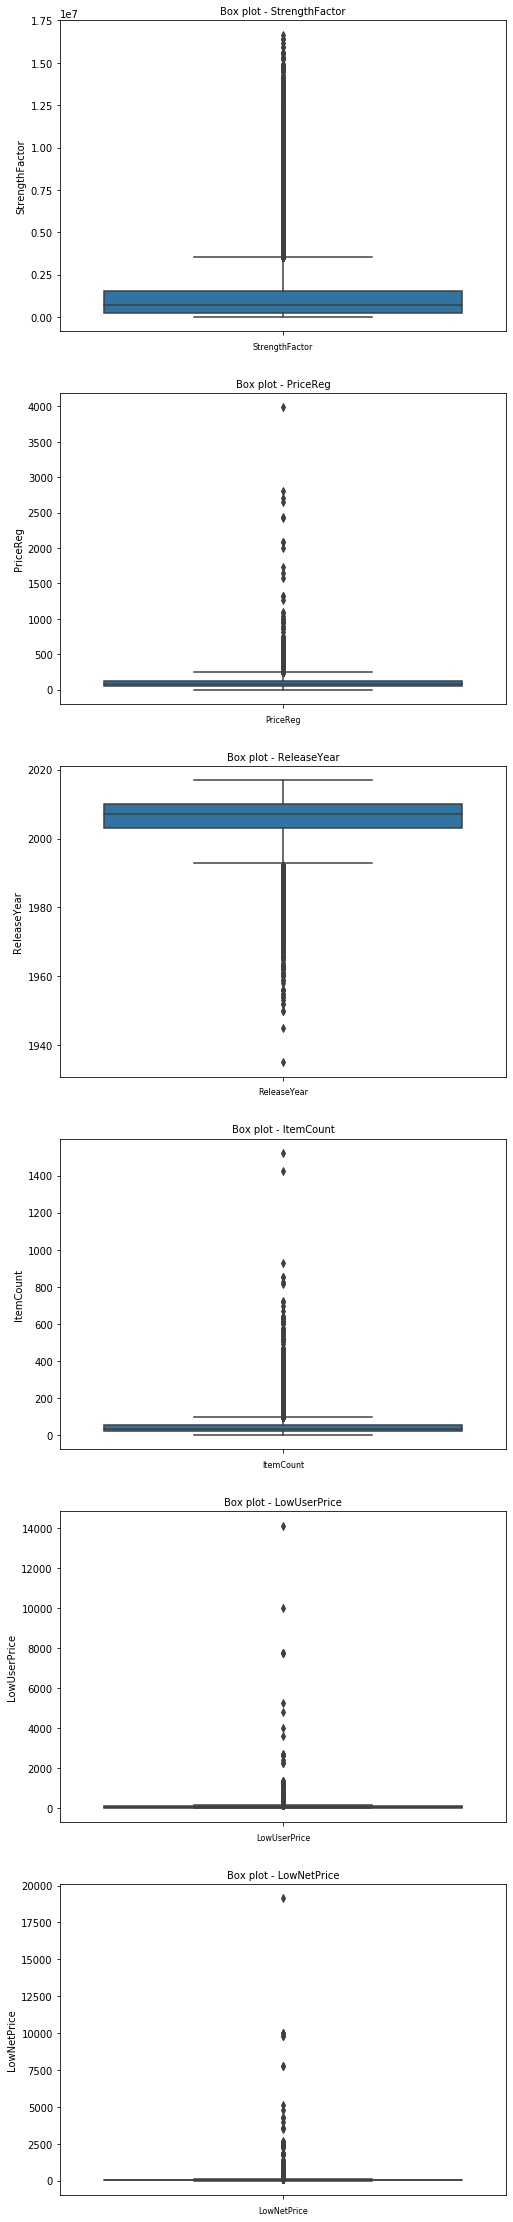

In [23]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=sales_data_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [30]:
np.percentile(x, [2.5, 97.5])

array([-1.92790627,  1.8495215 ])

In [37]:
(x < np.percentile(x, 2.5)) | (x > np.percentile(x, 97.5))

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [41]:
False | False 

False

In [42]:
data  = np.random.rand(1000)

(array([112., 111.,  98.,  91., 100., 109.,  90.,  92.,  93., 104.]),
 array([2.05116643e-04, 1.00113232e-01, 2.00021348e-01, 2.99929464e-01,
        3.99837579e-01, 4.99745695e-01, 5.99653811e-01, 6.99561926e-01,
        7.99470042e-01, 8.99378158e-01, 9.99286273e-01]),
 <a list of 10 Patch objects>)

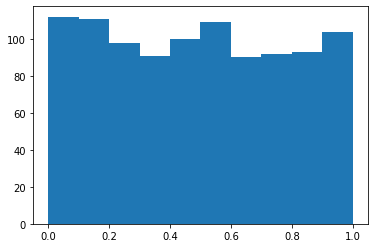

In [43]:
plt.hist(data)

In [45]:
lower_out =  data < np.percentile(data, 5)

(array([8., 4., 5., 5., 5., 5., 4., 6., 2., 6.]),
 array([0.00020512, 0.00409165, 0.00797819, 0.01186472, 0.01575125,
        0.01963779, 0.02352432, 0.02741086, 0.03129739, 0.03518393,
        0.03907046]),
 <a list of 10 Patch objects>)

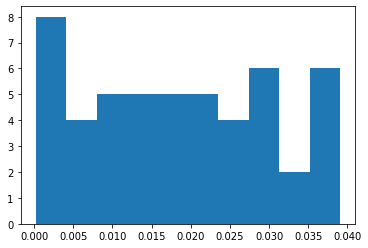

In [47]:
plt.hist(data[lower_out])

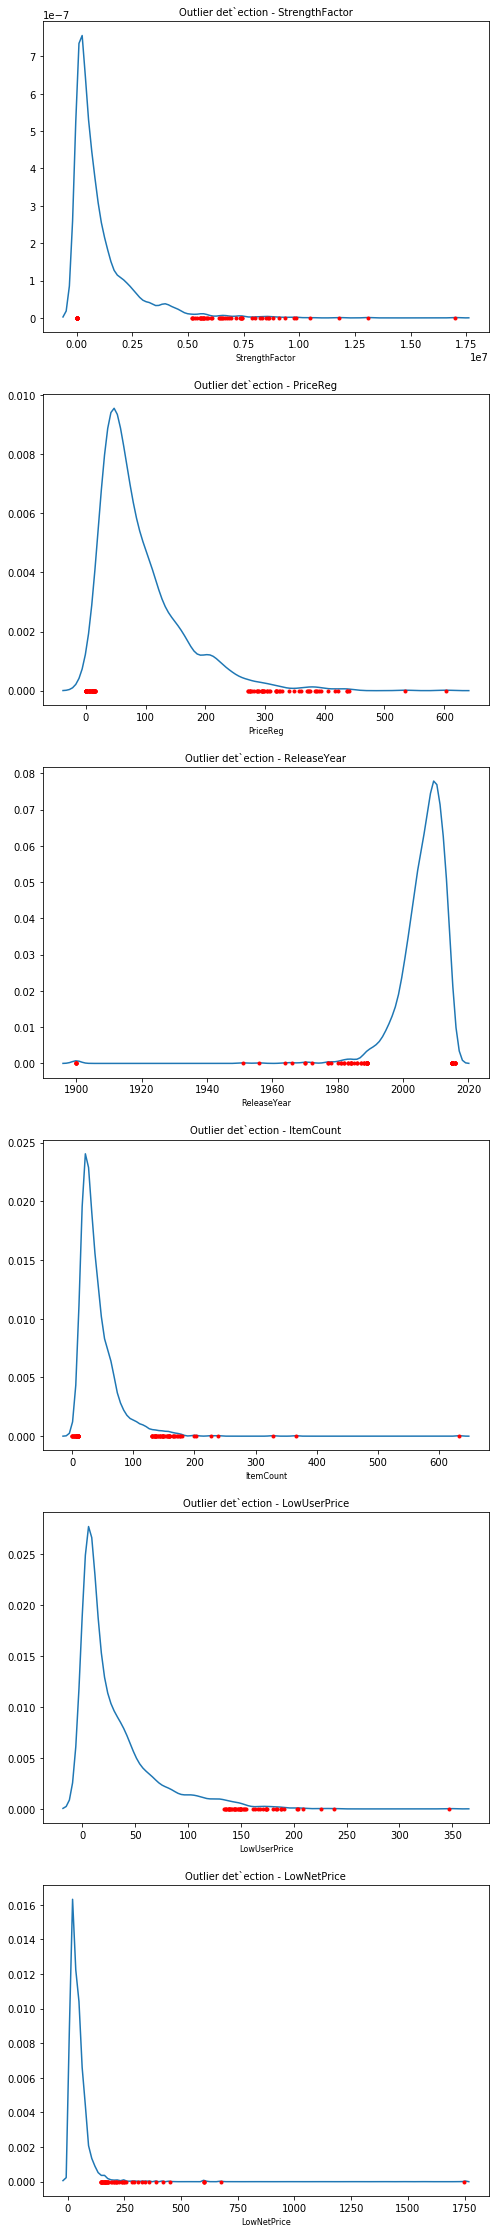

In [50]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']


fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = sales_data[col_val][::100]
    sns.distplot(x, ax=ax[i], hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'r.')
    ax[i].set_title('Outlier det`ection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

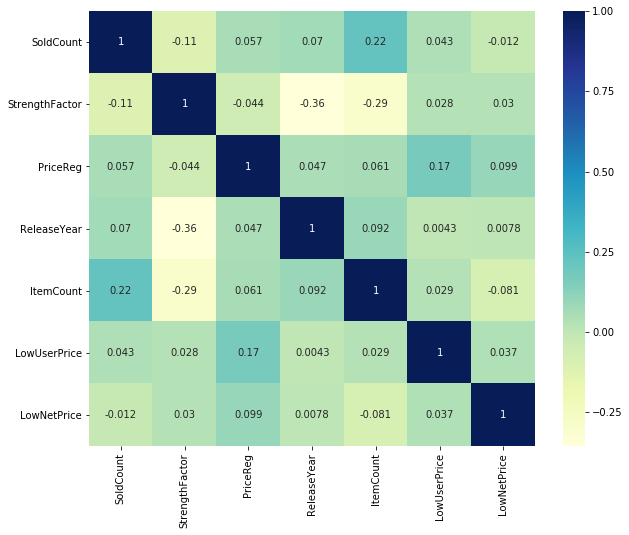

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sales_data_hist.corr()
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu")